In [39]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [40]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [41]:
from sklearn.datasets import load_breast_cancer

In [42]:
# Brest Cancer Dataset
df = load_breast_cancer()

**Features**

In [43]:
features = df["data"]

X = pd.DataFrame(features)

X.columns = df["feature_names"]
X[::50]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
50,11.76,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.01115,0.1495,0.05888,...,12.98,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563
100,13.61,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.04489,0.1609,0.05871,...,16.99,35.27,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397
150,13.00,20.78,83.51,519.4,0.11350,0.07589,0.031360,0.02645,0.2540,0.06087,...,14.16,24.11,90.82,616.7,0.12970,0.11050,0.08112,0.06296,0.3196,0.06435
200,12.23,19.56,78.54,461.0,0.09586,0.08087,0.041870,0.04107,0.1979,0.06013,...,14.44,28.36,92.15,638.4,0.14290,0.20420,0.13770,0.10800,0.2668,0.08174
250,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.271200,0.13100,0.2205,0.05898,...,25.58,27.00,165.30,2010.0,0.12110,0.31720,0.69910,0.21050,0.3126,0.07849
300,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.219700,0.10620,0.1792,0.06552,...,25.93,26.24,171.10,2053.0,0.14950,0.41160,0.61210,0.19800,0.2968,0.09929
350,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,0.05731,...,13.28,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825
400,17.91,21.02,124.40,994.0,0.12300,0.25760,0.318900,0.11980,0.2113,0.07115,...,20.80,27.78,149.60,1304.0,0.18730,0.59170,0.90340,0.19640,0.3245,0.11980
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.087770,0.02386,0.1349,0.06612,...,12.79,28.18,83.51,507.2,0.09457,0.33990,0.32180,0.08750,0.2305,0.09952


**Target**

In [44]:
y = df["target"]
y[::50]

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

### Regularization affect on training accuracy

In [45]:
# Weak Regularization
lr_wr = LogisticRegression(C = 100)

# Strong Regularization
lr_sr = LogisticRegression(C = 0.01)

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Fit training data in weak regularized logistic regression
lr_wr.fit(x_train, y_train)

# Fit training data in strong regularized logistic regression
lr_sr.fit(x_train, y_train)


lr_wr_score = lr_wr.score(x_train, y_train)
print("Score of training data in weak regularized logistic regression =", lr_wr_score, "\n")

lr_sr_score = lr_sr.score(x_train, y_train)
print("Score of training data in strong regularized logistic regression =", lr_sr_score)

Score of training data in weak regularized logistic regression = 0.949748743718593 

Score of training data in strong regularized logistic regression = 0.9170854271356784


### Lasso (L1) vs Ridge (L2) Regularization

In [46]:
# Logistic Regression Object (Lasso)
lr_l1 = LogisticRegression(penalty = "none")

# Logistic Regression Object (Ridge default)
lr_l2 = LogisticRegression()        

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Fit Data in lr_l1
lr_l1.fit(x_train, y_train)

# Fit Data in lr_l2
lr_l2.fit(x_train, y_train)


lr_l1_score = lr_l1.score(x_train, y_train)
print("Score of training data in Lasso Logistic Regression =", lr_wr_score, "\n")

lr_l2_score = lr_l2.score(x_train, y_train)
print("Score of training data in Ridge Logistic Regression =", lr_sr_score)


Score of training data in Lasso Logistic Regression = 0.949748743718593 

Score of training data in Ridge Logistic Regression = 0.9170854271356784


### Plot Coefficients (Lasso)

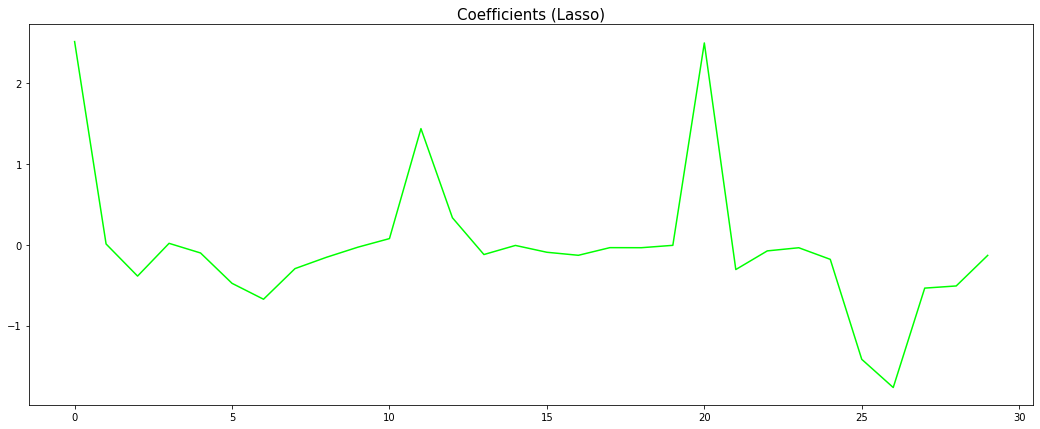

In [47]:
plt.figure(figsize = (18, 7))
plt.plot(lr_l1.coef_.flatten(), color = "lime")
plt.title("Coefficients (Lasso)", size = 15)
plt.show()

### Plot Coefficients (Ridge)

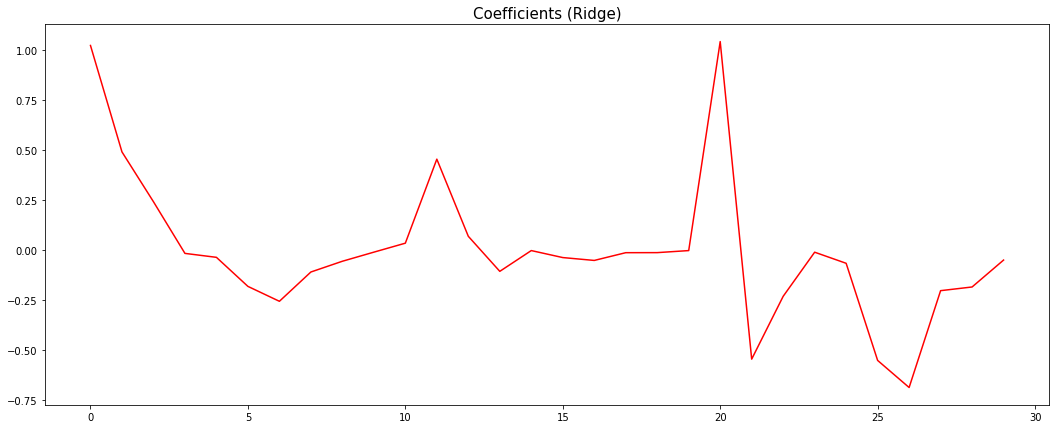

In [48]:
plt.figure(figsize = (18, 7))
plt.plot(lr_l2.coef_.flatten(), color = "red")
plt.title("Coefficients (Ridge)", size = 15)
plt.show()

### Logistic regression and Feature Selection

In [49]:
# Specify L1 regularization
lr = LogisticRegression(penalty = "none")

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {"C": [0.001, 0.01, 0.1, 1, 10]})


# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

searcher.fit(x_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_, "\n")

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_

print("Total Number of features: ", coefs.size, "\n")

print("Number of selected features: ", np.count_nonzero(coefs))

Best CV params {'C': 0.001} 

Total Number of features:  30 

Number of selected features:  30


### Import Juice Dataset

In [50]:
juice = pd.read_csv("juice.csv")
juice.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [51]:
def label(x):
    if x == 1:
        return 0
    elif x == 2:
        return 1
    else:
        return 2
    
juice["class_label"] = juice["class_label"].apply(label)
juice.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,0,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Multi-class logistic regression

In [52]:
# Features
X = juice[juice.columns.drop(["class_label", "class_name"])]

# Target
y = juice["class_label"]

In [53]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

**One-vs-rest vs softmax classifier**

In [57]:
# Fit one-vs-rest logistic regression classifier
lr_ovs = LogisticRegression()
lr_ovs.fit(x_train, y_train)

print("One-vs_Rest Training Accuracy: ", lr_ovs.score(x_train, y_train))
print("One-vs-Rest Test Accuracy: ", lr_ovs.score(x_test, y_test), "\n")


# Fit softmax classifier
lr_mn = LogisticRegression(multi_class = "multinomial",solver = "lbfgs")
lr_mn.fit(x_train, y_train)

print("Softmax Training Accuracy:", lr_mn.score(x_train, y_train))
print("Softmax Testing Accuracy: ", lr_mn.score(x_test, y_test))

One-vs_Rest Training Accuracy:  0.9887640449438202
One-vs-Rest Test Accuracy:  0.9325842696629213 

Softmax Training Accuracy: 0.9887640449438202
Softmax Testing Accuracy:  0.9325842696629213


### Regularized logistic regression

In [55]:
# Train and validaton errors initialized as empty list

train_errors = list()
test_errors = list()

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.5,
                                                    random_state = 42)

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C = C_value)
    lr.fit(x_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append(1.0 - lr.score(x_train, y_train))
    
    test_errors.append(1.0 - lr.score(x_valid, y_valid))

# Plot results
plt.semilogx(C_value, train_errors, C_value, test_errors)
plt.legend(("train", "test"))
plt.show()

NameError: name 'x_valid' is not defined

### Regularization and probabilities

In [ ]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))